# IQVIA NLP API

## Optional: Analysing results from APIs

This session is optional. In this session, we will demonstrate how to use the results from different IQVIA NLP API to gain insights of the input data.

Please note, in order to save your API usage and time, we have provided the pre-run results in this package. The input for these results are synthetic data, please do not take any of the analysis results shown in this demo as scientific proofs.

### Insights of the population from Social Determinants of Health (SDoH) API results

Load the data as a pandas dataframe.

In [24]:
import os
import pandas as pd

pd.set_option("display.max_rows", None, "display.max_columns", None, "display.width", 1000)

df_sdoh = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), "demo_docs/HC_data_analysis/SDoH_prerun.csv"), dtype=str, encoding="utf-8")

print("Pre-run SDoH results loaded! Preview:")
df_sdoh.head(10)

Pre-run SDoH results loaded! Preview:


,topic_class,topic,text,polarity,suggested_codes,Doc ID
0,Employment Status,Not employed,He works as a payroll representative and previ...,FALSE,"[{'ontology': 'snomed', 'code': '224363007', '...",M10.txt
1,Substance Abuse,Tobacco abuse,... HISTORY : He is a non-cigarette smoker and...,FALSE,"[{'ontology': 'snomed', 'code': '8392000', 'de...",M10.txt
2,Weight Range Category,Obesity NOS,... GENERAL : Presents as an obese 60-year-old...,TRUE,"[{'ontology': 'snomed', 'code': '414915002', '...",M10.txt
3,Weight Range Category,Obesity NOS,ABDOMEN : Obese .,TRUE,"[{'ontology': 'snomed', 'code': '414915002', '...",M10.txt
4,Ambulatory Issue,Difficulty ambulating,"... , snapping , malalignment , difficulty wit...",TRUE,"[{'ontology': 'snomed', 'code': '719232003', '...",M104.txt
5,Ambulatory Issue,Difficulty ambulating,... over time and is having difficulty ambulat...,TRUE,"[{'ontology': 'snomed', 'code': '719232003', '...",M106.txt
6,Physical Inactivity,Counseling to increase physical activity,... patient was given crutches and instructed ...,TRUE,"[{'ontology': 'snomed', 'code': '129861002', '...",M106.txt
7,Ambulatory Issue,Difficulty ambulating,... time and it is currently difficult for her...,TRUE,"[{'ontology': 'snomed', 'code': '719232003', '...",M107.txt
8,Depression,Depression NOS,... patient is on fluoxetine for depression an...,TRUE,"[{'ontology': 'snomed', 'code': '35489007', 'd...",M108.txt
9,Living Condition,Live alone,"... is a nonsmoker , and lives with her husban...",FALSE,"[{'ontology': 'snomed', 'code': '365481000', '...",M108.txt


Keep only columns of interest.

In [25]:
df_sdoh = df_sdoh[["topic_class", "topic", "polarity", "Doc ID"]].drop_duplicates()

df_sdoh.head(10)

,topic_class,topic,polarity,Doc ID
0,Employment Status,Not employed,FALSE,M10.txt
1,Substance Abuse,Tobacco abuse,FALSE,M10.txt
2,Weight Range Category,Obesity NOS,TRUE,M10.txt
4,Ambulatory Issue,Difficulty ambulating,TRUE,M104.txt
5,Ambulatory Issue,Difficulty ambulating,TRUE,M106.txt
6,Physical Inactivity,Counseling to increase physical activity,TRUE,M106.txt
7,Ambulatory Issue,Difficulty ambulating,TRUE,M107.txt
8,Depression,Depression NOS,TRUE,M108.txt
9,Living Condition,Live alone,FALSE,M108.txt
10,Substance Abuse,Tobacco abuse,FALSE,M108.txt


First, let's explore at a high-level to find out the SDoH topics which the population is suffering the most.

In [26]:
# construct a new dataframe from the data by counting the unique values in "polarity" for each topic class
df_topic_cnt_1 = df_sdoh.groupby(by=["topic_class", "polarity"])["polarity"].count().reset_index(name="count")

df_topic_cnt_1


,topic_class,polarity,count
0,Ambulatory Issue,FALSE,8
1,Ambulatory Issue,TRUE,13
2,Depression,FALSE,9
3,Depression,TRUE,32
4,Employment Status,FALSE,4
5,Employment Status,TRUE,2
6,Limited English,FALSE,1
7,Living Condition,FALSE,13
8,Living Condition,TRUE,3
9,Physical Inactivity,TRUE,7


In [27]:
# transform the new dataframe to get each unique polarity mention count having its column

df_topic_cnt_2 = df_topic_cnt_1.pivot(index="topic_class", columns="polarity", values="count")

df_topic_cnt_2

polarity,FALSE,NeedReview,TRUE
topic_class,,,
Ambulatory Issue,8.0,NaN,13.0
Depression,9.0,NaN,32.0
Employment Status,4.0,NaN,2.0
Limited English,1.0,NaN,NaN
Living Condition,13.0,NaN,3.0
Physical Inactivity,NaN,NaN,7.0
Stress,1.0,1.0,7.0
Substance Abuse,34.0,NaN,30.0
Victim of Crime and Violence,NaN,NaN,2.0


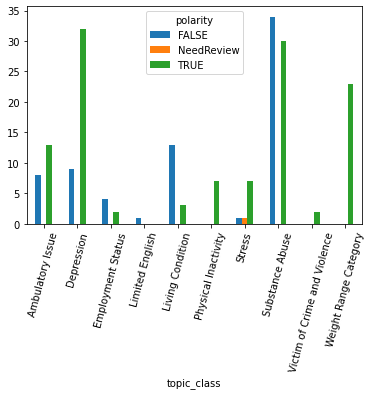

In [28]:
from matplotlib import pyplot as plt

# plot the new dataframe
polarity_cnt_cols = list(set(df_topic_cnt_2))

df_topic_cnt_2.plot(y=polarity_cnt_cols, use_index=True, kind="bar", rot=75)
plt.show()

From the above results, we could clearly see that within this population, the most suffered issues are depression. We could also see that a large population is suffering from substance abuse.

As the next step, let's dive deeper into the data to find out the exact substance abuse categories the population is suffering from.

In [29]:
# construct a new dataframe for substance abuse where "polarity" is "TRUE"
df_sub_abuse = df_sdoh.loc[(df_sdoh["topic_class"] == "Substance Abuse") & (df_sdoh["polarity"] == "TRUE")]

df_sub_abuse.head()

,topic_class,topic,polarity,Doc ID
20,Substance Abuse,Tobacco abuse,TRUE,M12.txt
39,Substance Abuse,Illicit drug abuse,TRUE,M139.txt
43,Substance Abuse,Prescription drug abuse,TRUE,M139.txt
45,Substance Abuse,Substance abuse NOS,TRUE,M139.txt
47,Substance Abuse,Past illicit drug abuse,TRUE,M139.txt


In [30]:
# count the number of rows for each topic under "Substance Abuse"
df_sub_abuse_topic_cnt = df_sub_abuse.groupby(by="topic")["topic"].count().reset_index(name="count")

df_sub_abuse_topic_cnt = df_sub_abuse_topic_cnt.set_index("topic")

df_sub_abuse_topic_cnt

,count
topic,
Alcohol abuse,3
Illicit drug abuse,9
Past illicit drug abuse,1
Past tobacco abuse,4
Prescription drug abuse,3
Substance abuse NOS,2
Tobacco abuse,8


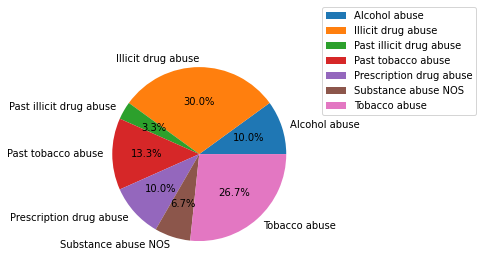

In [31]:
# create a pie chart to see the frequency of each topic for substance abuse

df_sub_abuse_topic_cnt.plot.pie(y="count", legend=None, ylabel="", autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.04,1.2))
plt.show()

From the figure above, we could see that drug abuse is the most common issue (total proportion: 43.3%) among the population. Within the population who have drug abuse issues, about 76.9% are suffering from illicit drug abuse and 23.1% from prescription drug abuse. Tobacco abuse comes very high in the second place - 40% of the mentioned substance abuse issues are tobacco abuse. 10% of the mentioned substance abuse issues are alcohol abuse.

Similarly, you could study the distribution of other subcategories associated with each topic within the population. Or you could select one patient (hint: use the "Doc ID" column) to understand the specific issues associated with the patient.

### Insights of the population from Healthcare Concepts API and SDoH API combined results

Healthcare concepts API extracts features related to a patient's medical status. Social determinants of health features describe the population's daily life issues. If we could combine these features, we could have a much better picture of patient profile related to specific diseases.

In this section, we will demonstrate how to explore patient profiles with results from the APIs with two examples. In the first example, we will show you how to find the diabetes population and explore the associated features within the population. In the second example, we will show you how to visualise the correlations between age groups and social determinants of health features.

#### Example one. Diabetes patient profiles

Let's first load another dataset (pre-run results from Healthcare Concepts API) as a pandas dataframe and find out the patients who have diabetes.


In [32]:
# read in the dataset
df_hcc = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), "demo_docs/HC_data_analysis/HealthcareConcepts_prerun.csv"), dtype=str, encoding="utf-8")

print("Pre-run Healthcare Concepts results loaded! Preview:")
df_hcc.head(10)

Pre-run Healthcare Concepts results loaded! Preview:


,concept,category,preferred_term,text,Doc ID
0,5-0 nylon suture,MedicalEquipment,Sutures,... the area were closed with 5-0 nylon suture .,M1.txt
1,a consultation,TreatmentAndProcedures,Consultation (procedure),This is a consultation for the patient in rega...,M1.txt
2,A sterile dressing,TreatmentAndProcedures,Application of dressing (procedure),A sterile dressing was applied .,M1.txt
3,A sterile dressing,MedicalEquipment,Bandages,A sterile dressing was applied .,M1.txt
4,A sterile dressing,TreatmentAndProcedures,Sterilisation,A sterile dressing was applied .,M1.txt
5,an obvious skin lesion,BodyStructure,Skin,There was an obvious skin lesion there and thi...,M1.txt
6,anesthetic,MedicationClass,Agent Affecting Nervous System,Local anesthetic medication was infiltrated ar...,M1.txt
7,anesthetic,MedicationName,Anesthetic Agent,Local anesthetic medication was infiltrated ar...,M1.txt
8,biopsy,ExaminationName,Biopsy,A punch biopsy of the worrisome skin lesion ...,M1.txt
9,biopsy,ExaminationName,Biopsy,A punch biopsy of the worrisome skin lesion ...,M1.txt


In [33]:
# find patients with diabetes, with Doc ID as unique patient identifier
df_tmp = df_hcc.loc[df_hcc["preferred_term"].str.contains("diabetes|Diabetes")]
diabetes_pt_ids = df_tmp["Doc ID"].unique().tolist()

# create a dataframe with all data related to the patient list
df_diabetes_hcc = df_hcc.loc[df_hcc["Doc ID"].isin(diabetes_pt_ids)]

# take a look at all categories
print(df_hcc["category"].unique())

# preview the result
df_diabetes_hcc.head(10)

['MedicalEquipment' 'TreatmentAndProcedures' 'BodyStructure'
 'MedicationClass' 'MedicationName' 'ExaminationName' 'DiseaseOrSymptom'
 'Age' 'Gender' 'RouteOfMedication' 'MeasurementValue' 'Dosage'
 'GeneORProtein' 'PopulationGroup' 'Frequency' 'MeasurementUnit'
 'FamilyRelation' 'Date' 'HealthcareProfession' 'CareEnvironment' 'Time'
 'MedicationForm' 'AdministrativeEvent' 'ConditionScale']


,concept,category,preferred_term,text,Doc ID
95,0.4,MeasurementValue,0.4,"... 40 mg daily , Flomax 0.4 mg daily , Detrol...",M10.txt
96,0.4 mg daily,Dosage,0.4 mg every 1d,"... 40 mg daily , Flomax 0.4 mg daily , Detrol...",M10.txt
97,1,MeasurementValue,1,"... of the pancreas , approximately 1 cm , mos...",M10.txt
98,1,MeasurementValue,1,"... the tail and size of 1 cm , the likelihood...",M10.txt
99,1+ pitting edema,DiseaseOrSymptom,1+ pitting edema (finding),EXTREMITIES : Revealed about 1+ pitting edema .,M10.txt
100,1.8-cm,MeasurementValue,1.8,The CAT scan revealed 1.8-cm lesion of his lef...,M10.txt
101,1.8-cm lesion,BodyStructure,Lesion (morphologic abnormality),The CAT scan revealed 1.8-cm lesion of his lef...,M10.txt
102,4,MeasurementValue,4,"... 0.4 mg daily , Detrol 4 mg daily , Zyrtec ...",M10.txt
103,4 mg daily,Dosage,4 mg every 1d,"... 0.4 mg daily , Detrol 4 mg daily , Zyrtec ...",M10.txt
104,5,MeasurementValue,5,"MEDICATIONS : Include glipizide 5 mg b.i.d. , ...",M10.txt


Let's take a look at the dataset and see the age group distribution for population with diabetes.

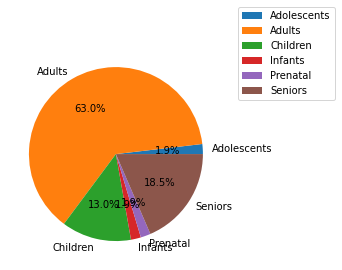

In [34]:
df_diabetes_age = df_diabetes_hcc.loc[df_diabetes_hcc["category"] == "Age"]

df_diabetes_age = df_diabetes_age.groupby(by="preferred_term")["preferred_term"].count().reset_index(name="count").set_index("preferred_term")

df_diabetes_age.plot.pie(y="count", ylabel="", autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.04,1.2))
plt.show()


As the figure shows, majority of diabetes population are adults (63.0%) and seniors (18.5%). Interestingly, there are younger groups who also have diabetes. We could select these groups and take a deeper look.

In [35]:
# find the younger groups with diabetes
df_tmp = df_diabetes_hcc.loc[df_diabetes_hcc["preferred_term"].isin(["Adolescents", "Children", "Infants", "Prenatal"])]
diabetes_young_ids = df_tmp["Doc ID"].unique().tolist()

df_diabetes_young = df_diabetes_hcc.loc[(df_diabetes_hcc["preferred_term"].str.contains("diabetes|Diabetes")) & (df_diabetes_hcc["Doc ID"].isin(diabetes_young_ids))]
df_diabetes_young = df_diabetes_young.groupby(by="preferred_term")["preferred_term"].count().reset_index(name="count")

df_diabetes_young

,preferred_term,count
0,Diabetes Mellitus,27
1,"Diabetes Mellitus, Type 2",2
2,Diabetes mellitus,9
3,Diabetes mellitus type 2 (disorder),1
4,Type 2 Diabetes Mellitus,1
5,Type 2 diabetes mellitus,1


However, as shown in the table above, it is hard to know which specific type of diabetes the younger groups are having based on the information from this dataset, as the majority of the mentions do not contain the type.

There are other types of correlations between features worth exploring within this dataset. Please give it a try yourself. Next, let's move on to see how we incorporate the social determinants of health features into this analysis.

Let's reuse the dataframe from the previous section, and select the rows from the SDoH API results where "polarity" is "TRUE" within the diabetes patient list.

In [36]:
df_diabetes_sdoh = df_sdoh.loc[(df_sdoh["polarity"] == "TRUE") & (df_sdoh["Doc ID"].isin(diabetes_pt_ids))].drop_duplicates()

df_diabetes_sdoh.head(10)

,topic_class,topic,polarity,Doc ID
2,Weight Range Category,Obesity NOS,TRUE,M10.txt
18,Weight Range Category,Obesity class 3,TRUE,M114.txt
23,Ambulatory Issue,Ambulate with assistive device (crutches),TRUE,M127.txt
24,Depression,Signs and symptoms of depression,TRUE,M13.txt
69,Substance Abuse,Alcohol abuse,TRUE,M150.txt
70,Weight Range Category,Normal weight,TRUE,M150.txt
71,Depression,Signs and symptoms of depression,TRUE,M151.txt
72,Physical Inactivity,Mention of inactivity,TRUE,M151.txt
73,Physical Inactivity,Mention of physical activity type,TRUE,M151.txt
76,Weight Range Category,Obesity class 1,TRUE,M151.txt


Let's see which SDoH features are most common within diabetes population.

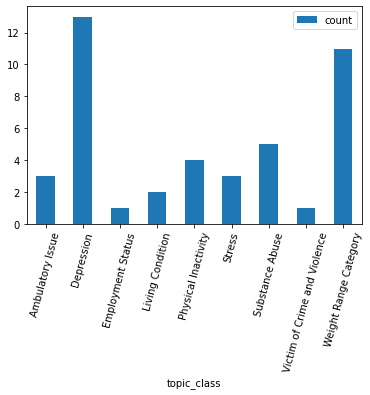

In [37]:
df_topic_cnt_diabetes_sdoh = df_diabetes_sdoh.groupby(by=["topic_class"])["topic_class"].count().reset_index(name="count").set_index("topic_class")

df_topic_cnt_diabetes_sdoh.plot(kind="bar", rot=75)
plt.show()

As shown from the bar chart, the most common SDoH features associated with diabetes population are depression and weight issues. There are significant less proportion of population suffering from substance abuse within the diabetes population comparing with the full population described in this dataset (please refer to the bar chart in the previous section).

#### Example two. Age group and SDoH features

Now, let's combine the healthcare concept and SDoH dataset to see what we could learn from there.

The two dataframes should be merged based on "Doc ID".

In [38]:
# find rows in heathcare concept results mentioning "Age"
df_pop_hcc = df_hcc.loc[df_hcc["category"] == "Age"][['preferred_term','Doc ID']].drop_duplicates()

# find out rows in sdoh results with "TRUE" polarity
df_pop_sdoh = df_sdoh.loc[df_sdoh["polarity"] == "TRUE"][['topic_class', 'topic', 'Doc ID']].drop_duplicates()

# combine data
df_pop = df_pop_hcc.merge(df_pop_sdoh, on="Doc ID", how="inner")

print(df_pop.shape)
df_pop.head(10)

(162, 4)


,preferred_term,Doc ID,topic_class,topic
0,Adults,M10.txt,Weight Range Category,Obesity NOS
1,Children,M10.txt,Weight Range Category,Obesity NOS
2,Seniors,M104.txt,Ambulatory Issue,Difficulty ambulating
3,Adults,M106.txt,Ambulatory Issue,Difficulty ambulating
4,Adults,M106.txt,Physical Inactivity,Counseling to increase physical activity
5,Adults,M107.txt,Ambulatory Issue,Difficulty ambulating
6,Adults,M108.txt,Depression,Depression NOS
7,Adults,M114.txt,Weight Range Category,Obesity class 3
8,Adults,M12.txt,Substance Abuse,Tobacco abuse
9,Children,M12.txt,Substance Abuse,Tobacco abuse


Let's first get an idea of age group distribution within the population described in this dataset.

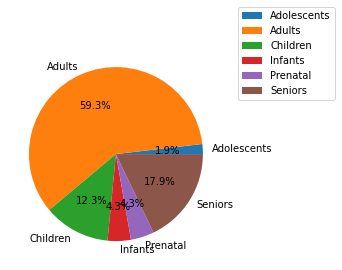

In [39]:
df_pop_cnt = df_pop.groupby(by="preferred_term")["preferred_term"].count().reset_index(name="count")
df_pop_cnt = df_pop_cnt[["preferred_term", "count"]].set_index("preferred_term")

df_pop_cnt.plot.pie(y="count", ylabel="", autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.04,1.2))
plt.show()

From the pie chart, we could see that majority of population (59.3%) in this dataset are adults. Please note there are 4.3% prenatal mentions, but from what we know about the dataset, those records actually belong to the mums during pregnancy. Similarly, the 4.3% infants mentions in the dataset are also from records of the parents.

Let's plot the SDoH features associated with each group with network.

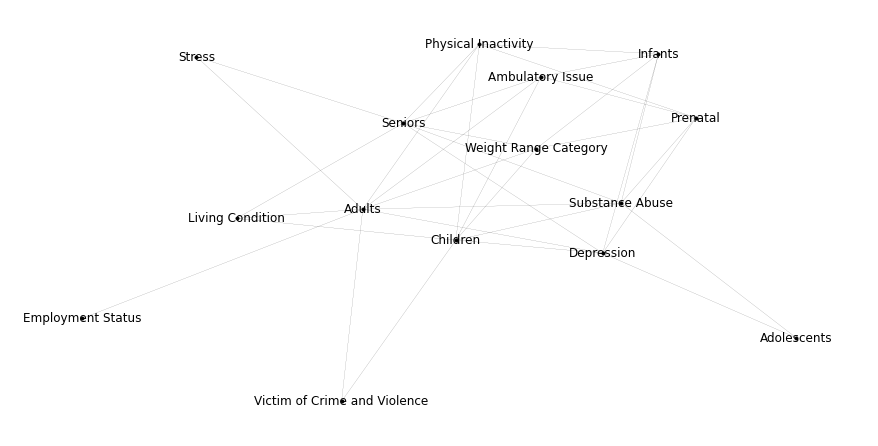

In [41]:
import networkx as nx

G = nx.from_pandas_edgelist(df_pop, source='topic_class', target='preferred_term', edge_attr=None)

plt.figure(figsize = (12,6))

options = {
    "node_color": "black",
    "node_size": 10,
    "linewidths": 0.8,
    "width": 0.1,
}
nx.draw(G, with_labels = True, **options)
plt.show()


From the network plot, we could find the social determinants of health features associated with different age groups in this dataset. Depression is correlated to all age groups. Adults are correlated to all kinds of social determinant problems, and is the only group correlated to unemployment. Seniors are less likely to be correlated to victim of crime and violence.

## Summary

Here comes to the end of the session. To recap, in this demo, we showed some examples of using our SDoH NLP API and Healthcare Concepts NLP API to gain insights of medical data. Just to re-emphasis: the input for these results are synthetic data, please do not take any of the analysis results shown in this demo as scientific proofs.

Hope you enjoyed the session! If you are keen to do something similar to your own data, why not register and get a free license to use the IQVIA NLP API to try it out yourself?

Thank you for your attention! Bye!